In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

(60000, 784)
(10000, 784)
Epoch 0 / 20 loss: 1082.8035073280334
Epoch 1 / 20 loss: 236.63942249119282
Epoch 2 / 20 loss: 122.99153557419777
Epoch 3 / 20 loss: 77.78809881210327
Epoch 4 / 20 loss: 58.9418668076396
Epoch 5 / 20 loss: 50.75841659680009
Epoch 6 / 20 loss: 47.003000907599926
Epoch 7 / 20 loss: 45.14110607281327
Epoch 8 / 20 loss: 44.122338596731424
Epoch 9 / 20 loss: 43.49899112805724
Epoch 10 / 20 loss: 43.07447277754545
Epoch 11 / 20 loss: 42.75942002236843
Epoch 12 / 20 loss: 42.51105586066842
Epoch 13 / 20 loss: 42.307411067187786
Epoch 14 / 20 loss: 42.136201698333025
Epoch 15 / 20 loss: 41.98988863825798
Epoch 16 / 20 loss: 41.863412376493216
Epoch 17 / 20 loss: 41.75312451273203
Epoch 18 / 20 loss: 41.656251050531864
Epoch 19 / 20 loss: 41.570610497146845
Trained


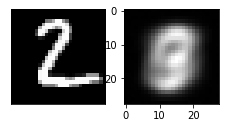

Results


In [7]:
class Autoencoder(object):
    def __init__(self, inout_dim, encoded_dim):
        learning_rate = 0.1
        
        # Weights and Biases for encoder only one hidden layer
        hidden_layer_weights = tf.Variable(tf.random.normal([inout_dim,encoded_dim]))
        hidden_layer_biases = tf.Variable(tf.random.normal([encoded_dim]))
         # Weights and Biases for decoder only one hidden layer
        output_layer_weights = tf.Variable(tf.random.normal([encoded_dim , inout_dim]))
        output_layer_biases = tf.Variable(tf.random.normal([inout_dim]))
        
        # Neural Network
        self._input_layer = tf.placeholder('float',[None, inout_dim])
        self._hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(self._input_layer,hidden_layer_weights),hidden_layer_biases))
        self._output_layer = tf.matmul(self._hidden_layer,output_layer_weights) + output_layer_biases
        self._real_output = tf.placeholder('float',[None, inout_dim]) # will act as constraints during loss function calc
        
        # mean square loss
        self._meansq = tf.reduce_mean(tf.square(self._output_layer - self._real_output))
        # train by minimizing the loss
        self._optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(self._meansq)
        # Now initialize the variables
        self._training = tf.global_variables_initializer()
        self._session = tf.Session()
        
    def train(self, input_train, input_test, batch_size, epochs):
        self._session.run(self._training)
        
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(int(input_train.shape[0]/batch_size)):
                epoch_input = input_train[ i*batch_size : (i+1) * batch_size]
                _, c = self._session.run([self._optimizer, self._meansq], feed_dict={self._input_layer: epoch_input, self._real_output: epoch_input})
                epoch_loss += c
            print('Epoch',epoch, '/', epochs, 'loss:',epoch_loss)
    
    def getEncodedImage(self, image):
        encoded_image = self._session.run(self._hidden_layer, feed_dict={self._input_layer:[image]})
        return encoded_image
    
    def getDecodedImage(self, image):
        decoded_image = self._session.run(self._output_layer, feed_dict={self._input_layer:[image]})
        return decoded_image
     
# (x_train,_), (x_test,_) = mnist.load_data()
# print(x_train.shape)

train_data = pd.read_csv("./mnist_train.csv").values
x_train = train_data[:,1:]
print(x_train.shape)
test_data = pd.read_csv("./mnist_test.csv").values
x_test = test_data[:,1:]
print(x_test.shape)
# train_data = pd.read_csv("./mnist_train.csv").values
# x_train = train_data[:,1:]

#prepare input

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # shape will be 60000 * 784
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # shape will be 10000 * 784

#Tensorflow implementation

autoencodertf = Autoencoder(x_train.shape[1], 16)
autoencodertf.train(x_train, x_test, 100, 20)

encoded_img = autoencodertf.getEncodedImage(x_test[1])
decoded_img = autoencodertf.getDecodedImage(x_test[1])

print("Trained")

# visualizing the Results

plt.figure(figsize = (20, 4))
subplot = plt.subplot(2,10,1)
plt.imshow(x_test[1].reshape(28,28))
plt.gray()

subplot.get_xaxis().set_visible(False)
subplot.get_yaxis().set_visible(False)

subplot = plt.subplot(2,10,2)

plt.imshow(decoded_img.reshape(28,28))
plt.gray()
plt.show()
subplot.get_xaxis().set_visible(False)
subplot.get_yaxis().set_visible(False)

print("Results")
